PE Ratio: 24.731792
Market Cap: 17095480836096
Current Price: 1263.3
Revenue: 9010640000000.0
Profit: 696210000000.0

Revenue Growth: 29.470101140434192%
Profit Growth: 14.687422782307882%
ROCE: 7.920450773277043%


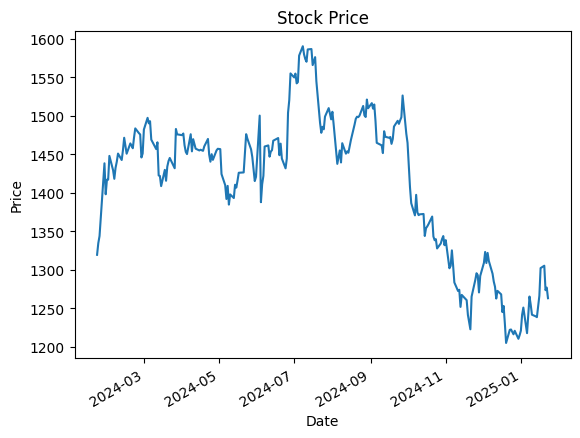

In [18]:
import yfinance as yf
from matplotlib import pyplot as plt
ticker_symbol = "RELIANCE.NS"
ticket = yf.Ticker(ticker_symbol)

history = ticket.history(period="1y")
history['Close'].plot(title="Stock Price", xlabel="Date", ylabel="Price")
# plt.show()
# print(history)


info = ticket.info
pe_ratio = info.get("trailingPE", "N/A")
market_cap = info.get("marketCap", "N/A")
current_price = info.get("currentPrice", "N/A")

financials = ticket.financials
revenue = financials.loc['Total Revenue'].values[0]
profit = financials.loc['Net Income'].values[0]
print(f"""PE Ratio: {pe_ratio}
Market Cap: {market_cap}
Current Price: {current_price}
Revenue: {revenue}
Profit: {profit}""")

revenue_3yr = financials.loc['Total Revenue']
profit_3yr = financials.loc['Net Income']

revenue_growth = (revenue_3yr.iloc[0] - revenue_3yr.iloc[2])/revenue_3yr.iloc[2] * 100
profit_growth = (profit_3yr.iloc[0] - profit_3yr.iloc[2])/profit_3yr.iloc[2] * 100

operating_profit = financials.loc['Operating Income'].iloc[0] 
total_assets = ticket.balance_sheet.loc['Total Assets'].iloc[0]
total_debt = ticket.balance_sheet.loc['Total Debt'].iloc[0]

roce = operating_profit/(total_assets - total_debt) * 100

print(f"""
Revenue Growth: {revenue_growth:}%
Profit Growth: {profit_growth}%
ROCE: {roce}%""")

0.8571428571428571
2024-01-23 00:00:00+05:30
2024-04-05 00:00:00+05:30
2024-04-09 00:00:00+05:30
2024-04-19 00:00:00+05:30
2024-05-02 00:00:00+05:30
2024-06-13 00:00:00+05:30
2024-08-13 00:00:00+05:30


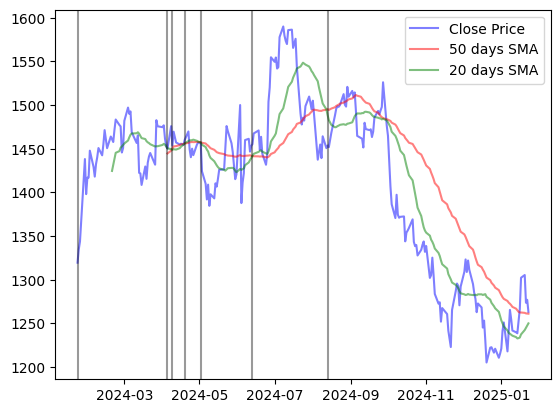

In [20]:
long_sma=0
small_sma = 0
cross = 0
history['long_sma'] = history['Close'].rolling(window=50).mean()
history['small_sma'] = history['Close'].rolling(window=20).mean()

plt.plot(history['Close'], label='Close Price', alpha=0.5, color='blue')
plt.plot(history['long_sma'], label='50 days SMA', alpha=0.5, color='red')
plt.plot(history['small_sma'], label='20 days SMA', alpha=0.5, color='green')
plt.legend()


history['Signal'] = 0
history.loc[history['long_sma'] > history['small_sma'], 'Signal'] = -1
history.loc[history['long_sma'] < history['small_sma'], 'Signal'] = 1
history.loc[history['Signal'] != history['Signal'].shift(1), 'cross'] = 1

history['accuracy'] = 0
history.loc[(history['cross'] == 1 & (history['Close'].pct_change()>0)), 'accuracy'] = 1
history.loc[(history['cross'] == -1 & (
    history['Close'].pct_change() < 0)), 'accuracy'] = 1


accuracy = history['accuracy'].sum()/history['cross'].sum()
print(accuracy)

cross = history.index[history['cross']==1].tolist()
for i in cross:
    print(i)
    plt.axvline(i, color='black', alpha=0.4)





In [22]:
import pandas as pd


crosses = history.index[history['cross'] == 1].tolist()
segments = []
for i in range(len(crosses) - 1):
    start = crosses[i]
    end = crosses[i + 1]
    segment = history.loc[start:end]
    if not segment.empty:
        segments.append(segment)


data = []
for ids, segment in enumerate(segments):
    ps = list(segment['Close'])
    ret = (ps[-1] - ps[0])
    pct_ret = (ret/ps[0])*100
    data.append({
        'Cross Number': ids + 1,
        'Start Price': ps[0],
        'End Price': ps[-1],
        'Return': ret,
        'Return %': f"{pct_ret}%"
    })

strategy_df = pd.DataFrame(data)
display(strategy_df)


,Cross Number,Start Price,End Price,Return,Return %
0,1,1319.587158,1450.222412,130.635254,9.8997063660528%
1,2,1450.222412,1453.748413,3.526001,0.24313518720441418%
2,3,1453.748413,1460.179565,6.431152,0.44238413509929836%
3,4,1460.179565,1456.628784,-3.550781,-0.24317428719495265%
4,5,1456.628784,1455.337524,-1.291260,-0.08864714055147438%
5,6,1455.337524,1453.723511,-1.614014,-0.11090304790463108%


Series([], Name: Close, dtype: float64) Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64) Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64) Series([], Name: Close, dtype: float64)
Series([], Name: Close, dtype: float64) Series([], Name: Close, dtype: float64)
Date
2025-01-23 00:00:00+05:30    1264.400024
Name: Close, dtype: float64 Series([], Name: Close, dtype: float64)
Date
2025-01-23 00:00:00+05:30    1264.400024
2025-01-22 00:00:00+05:30    1274.277764
Name: Close, dtype: float64 Series([], Name: Close, dtype: float64)
Date
2025-01-23 00:00:00+05:30    1264.400024
2025-01-22 00:00:00+05:30    1274.277764
2025-01-21 00:00:00+05:30    1273.855185
Name: Close, dtype: float64 Series([], Name: Close, dtype: float64)
Date
2025-01-23 00:00:00+05:30    1264.400024
2025-01-22 00:00:00+05:30    1274.277764
2025-01-21 00:00:00+05:30    1273.855185
2025-01-20 00:00:00+05:30    1296.574272
Name: Close, dtype: float64 Series([], Name: C

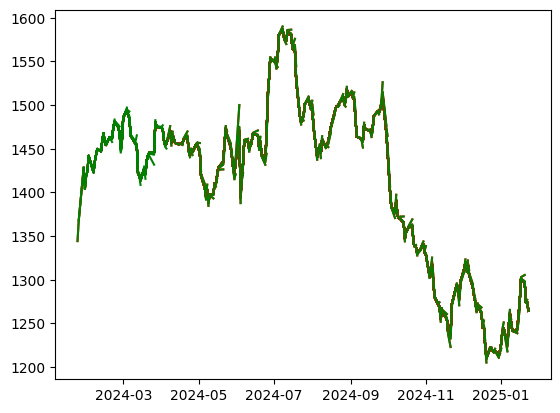

In [5]:

# long_ema=0
# short_ema=0
# # year plot:
# for i in range(300, 1, -1):
#     long_ema = history['Close'][i:i-50:-1].ewm(com=0.4).mean()
#     short_ema = history['Close'][i:i-20:-1].ewm(com=0.4).mean()
#     print(long_ema, short_ema)
#     plt.plot(long_ema, color='r', label="50 Day EMA")
#     plt.plot(short_ema, color='g', label="20 Day EMA")
    # print(long_ema)
    # print(short_ema)
    # print("----")
    # print(history['Close'][i+50])
    # print(history['Close'][i+20])

# long_ema = history['Close'][-50:-1].ewm(com=0.4).mean()

# # short_ema = history['Close'][20:-1].ewm(com=0.4).mean()
# plt.legend()
# plt.show()

